In [1]:
library(tidyverse) 
library(ggplot2)
adventure = read.csv("adventure-csv.csv")
crime = read.csv("crime3-csv-csv.csv")
comedy = read.csv("commedy-csv-(1)-csv.csv")
names(adventure) = names(crime) = names(comedy)
tv_data = rbind(adventure,crime,comedy)


In [2]:
tv_data

show_name,rating,years.1,years.2,episodes,seasons,category
<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>
Worst-Case Scenario,6.9,2010,NA,12,1,Adventure
Mythical Roads,7.4,2020,NA,57,7,Documentary
Escape from Scorpion Island,7.0,2007,NA,19,5,Adventure
Adventurers: Masters of Time,7.9,2005,2006,26,1,Animation
Iggy Arbuckle,5.0,2007,NA,26,1,Animation
Swords: Life on the Line,7.6,2009,NA,28,3,Adventure
Hillbilly Handfishin',6.6,2010,2013,19,2,Adventure
Meteorite Men,8.2,2009,2012,23,3,Adventure
Prison Break: Proof of Innocence,7.3,2006,NA,27,2,Short


##### 2.1.2 drop duplicates 

In [65]:
filtered = unique(tv_data)
filtered=na.omit(filtered)

#### 2.1.3 Log transform episode variable and save

In [66]:
filtered=transform(filtered, episodes=as.numeric(episodes))
filtered$log_episodes = log(filtered$episodes)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


#### 2.1.4 select subset and save 

In [67]:
sub_data = filtered[!duplicated(filtered$show_name),]


#### 2.2.1 Summary statistics of show ratings and number of episodes



In [68]:
summary(sub_data$rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.600   6.300   7.300   7.025   7.900   9.400 

In [69]:
summary(sub_data$episodes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   25.00   43.00   71.54   75.75 2158.00       1 

#### 2.2.2  Correlate the tv show rating with the number of episodes and number of seasons

In [23]:
rating = sub_data$rating
episodes = sub_data$episodes
seasons = sub_data$seasons
cor(rating,episodes)


[1] 0.009337343

In [24]:
cor(rating, seasons)

[1] 0.05737234

#### 2.2.3 What is the average rating for shows that ran for 2 seasons? 3 seasons? 4 seasons?

In [62]:
rating_by_seasons=sub_data %>% group_by(seasons) %>% 
  summarise(
  average_rating = mean(rating))
View(rating_by_seasons)

seasons,average_rating
<dbl>,<dbl>
1,7.201429
2,6.757500
3,7.058333
4,7.079412
5,7.063158
6,6.688889
7,6.954545
8,6.925000
9,7.916667


In [49]:
library(ggplot2)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



3.

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


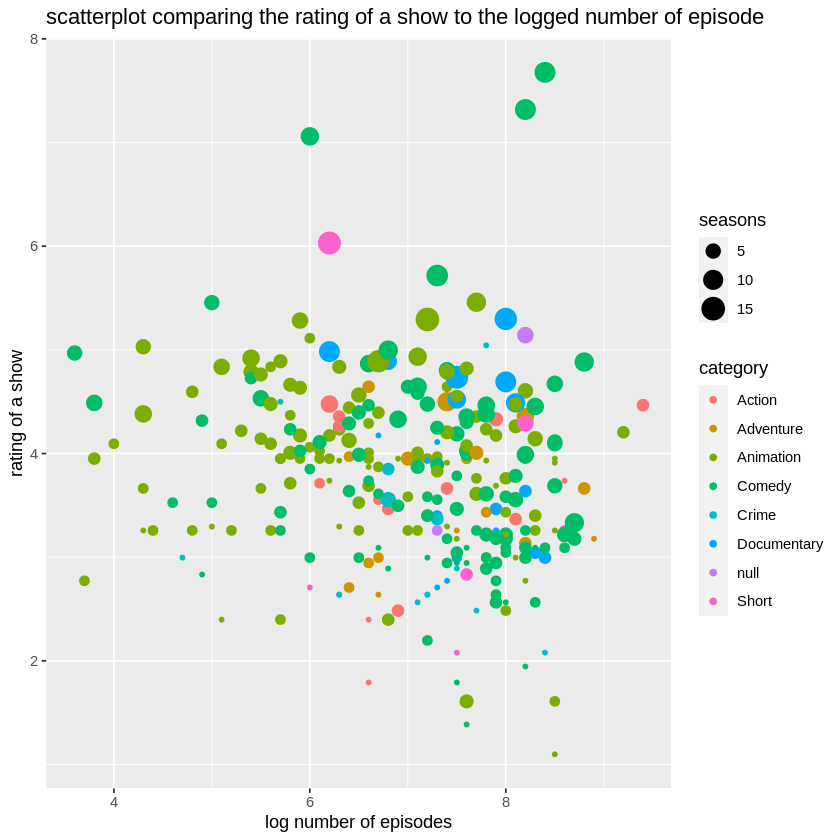

In [73]:
ggplot(sub_data,aes(rating,log_episodes)) + 
  geom_point(aes(colour = category,size = seasons)) +
   ggtitle("scatterplot comparing the rating of a show to the logged number of episode") +
  xlab("log number of episodes") + ylab("rating of a show")


In [56]:
table(sub_data)

ERROR: ignored

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


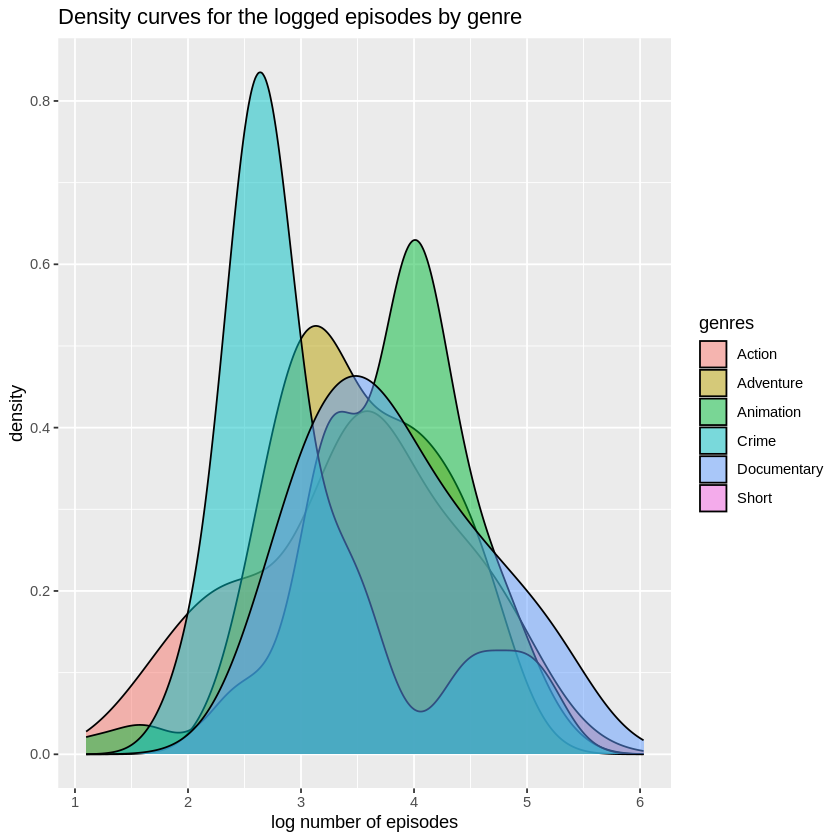

In [58]:
hundred=head(sub_data, 150)
genres <- hundred$category
log_epi <- log(hundred$episodes)
ggplot(hundred) + geom_density(aes(x=log_epi,fill = genres),alpha = 0.5) +
   ggtitle("Density curves for the logged episodes by genre") +
  xlab("log number of episodes") + ylab("density")
